<a href="https://colab.research.google.com/github/sachinthadilshann/UdemyMLProjects/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [360]:
df = pd.read_csv('https://raw.githubusercontent.com/sachinthadilshann/UdemyMLProjects/refs/heads/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [361]:
df.shape

(1470, 35)

In [362]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [363]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [365]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [366]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [367]:
df.select_dtypes(include='int64').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [368]:
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [369]:
for col in df.select_dtypes(include='object').columns:
    print(f" {col} :", df[col].nunique())

 Attrition : 2
 BusinessTravel : 3
 Department : 3
 EducationField : 6
 Gender : 2
 JobRole : 9
 MaritalStatus : 3
 OverTime : 2


In [370]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: ",df[col].unique())
    print()


Attrition:  ['Yes' 'No']

BusinessTravel:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department:  ['Sales' 'Research & Development' 'Human Resources']

EducationField:  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender:  ['Female' 'Male']

JobRole:  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus:  ['Single' 'Married' 'Divorced']

OverTime:  ['Yes' 'No']



In [371]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [372]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


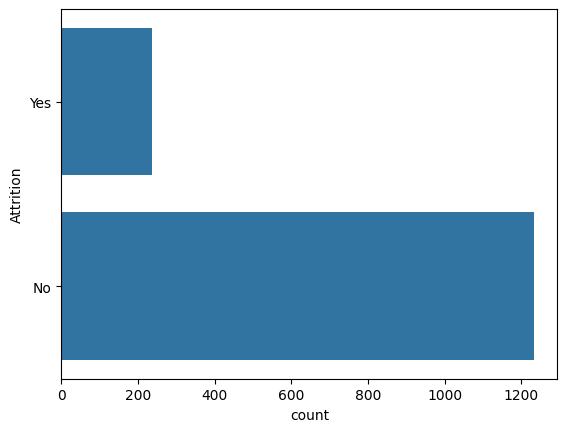

In [373]:
sns.countplot(df['Attrition'])
plt.show()

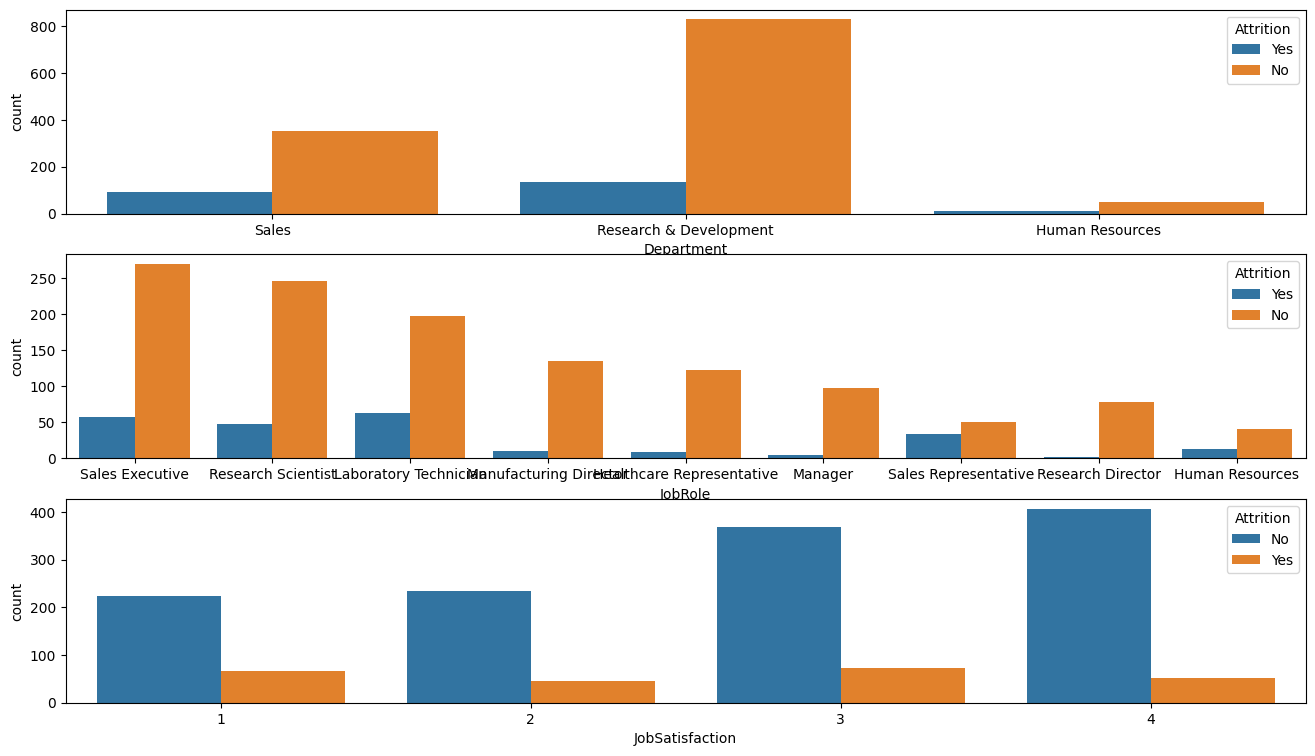

In [374]:
plt.figure(figsize=(16,9))
plt.subplot(311)
sns.countplot(x='Department', hue='Attrition', data=df)
plt.subplot(312)
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.subplot(313)
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.show()

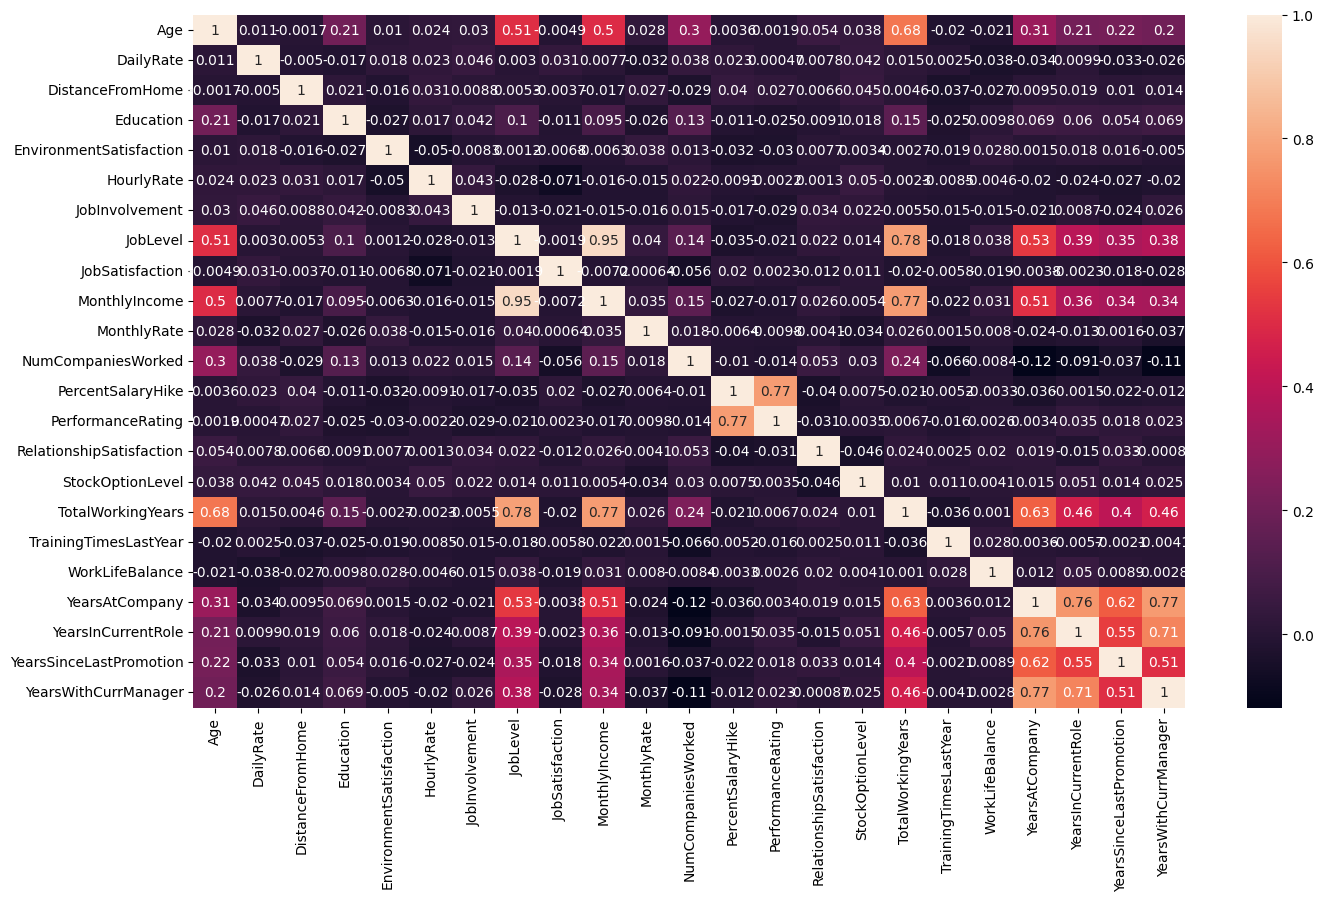

In [375]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)
plt.show()

In [376]:

df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False


In [377]:
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)

In [378]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [379]:
df.shape

(1470, 45)

In [380]:
df.rename(columns={'Attrition_Yes':'Attrition'}, inplace=True)

In [381]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

In [382]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [383]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [384]:
x_train

array([[ 2.3389367 , -0.48557354,  1.45567735, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.9043263 ,  0.36465323,  2.31628752, ...,  1.11547067,
        -0.69900472, -0.61535643],
       [ 0.35255307, -1.23722329,  2.0703989 , ...,  1.11547067,
        -0.69900472, -0.61535643],
       ...,
       [ 0.68361701,  0.92900666, -0.88026453, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.13184377, -1.31608491, -0.88026453, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.35255307, -0.35495899,  0.10328995, ..., -0.89648256,
        -0.69900472, -0.61535643]])

**LogisticRegression**

In [385]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)


LogisticRegression()

In [386]:
y_pred_lr = model_lr.predict(x_test)

In [387]:
acc_lr = accuracy_score(y_test, y_pred_lr)*100
acc_lr

88.43537414965986

In [388]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[237,   8],
       [ 26,  23]])

**RandomForestClassifier**

In [389]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [390]:
y_pred_rf = model_rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)*100
acc_rf

84.01360544217688

**XGBClassifier**

In [391]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [392]:
y_pred_xgb = model_xgb.predict(x_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)*100
acc_xgb

83.6734693877551

**SVC**

In [393]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(x_train, y_train)

SVC()

In [394]:
y_pred_svm = model_svm.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred_svm)*100
acc_svm

86.73469387755102

In [395]:
acc = {
    'LogisticRegression':acc_lr,
    'RandomForestClassifier':acc_rf,
    'XGBClassifier':acc_xgb,
    'SVC':acc_svm
}

acc = pd.DataFrame(acc, index=['Accuracy'])
acc


,LogisticRegression,RandomForestClassifier,XGBClassifier,SVC
Accuracy,88.435374,84.013605,83.673469,86.734694


**Randomized Search to find the best parameters(LogisticRegression)**

In [396]:
from sklearn.model_selection import RandomizedSearchCV

parms = {
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'C':[0.10,0.15,0.20,0.25,0.3,0.35,0.5,0.75,1.0,1.25,1.50,1.75],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[10,20,30,40,50,100,200,500,1000,2000,5000]
}

In [397]:
parms

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [10, 20, 30, 40, 50, 100, 200, 500, 1000, 2000, 5000]}

In [398]:
random_cv  = RandomizedSearchCV(estimator=model_lr, param_distributions=parms, n_iter=10,scoring='roc_auc' ,n_jobs=-1,cv=10, verbose=3)

In [399]:
random_cv.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35,
                                              0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
                                        'max_iter': [10, 20, 30, 40, 50, 100,
                                                     200, 500, 1000, 2000,
                                                     5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [400]:
random_cv.best_estimator_

LogisticRegression(C=0.3, max_iter=20, penalty='l1', solver='liblinear')

In [401]:
random_cv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 20, 'C': 0.3}

In [402]:
random_cv.best_score_

0.816573058427695

In [403]:
model_final = LogisticRegression(max_iter=40, penalty='l1', solver='saga')
model_final.fit(x_train, y_train)

LogisticRegression(max_iter=40, penalty='l1', solver='saga')

In [404]:
y_pred_final = model_final.predict(x_test)

acc_final = accuracy_score(y_test, y_pred_final)*100
acc_final

88.43537414965986

In [405]:
cm_final = confusion_matrix(y_test, y_pred_final)
cm_final

array([[237,   8],
       [ 26,  23]])

In [406]:
accuracy ={
    'LogisticRegression':acc_lr,
    'RandomForestClassifier':acc_rf,
    'XGBClassifier':acc_xgb,
    'SVC':acc_svm,
    'LogisticRegression_Tuned':acc_final
}

accuracy = pd.DataFrame(list(accuracy.items()), columns=['Model', 'Accuracy'])
accuracy


,Model,Accuracy
0,LogisticRegression,88.435374
1,RandomForestClassifier,84.013605
2,XGBClassifier,83.673469
3,SVC,86.734694
4,LogisticRegression_Tuned,88.435374
